In [1]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt
import serial
import time
from IPython.display import clear_output
%matplotlib inline

sys.path.insert(0, os.path.join(os.getcwd(), 'src'))
from Thymio import Thymio

import vision
import globalNavigation

In [2]:
#RUN THIS CELL IF YOU MODIFIED MODULES AND DONT WANT TO RESTART KERNEL
import importlib
importlib.reload(vision)
importlib.reload(globalNavigation)

<module 'globalNavigation' from '/Users/ken/Dropbox/EPFL/Basics_of_Mobile_Robotics/Project/EPFL_MoRo_Project/src/globalNavigation.py'>

# Detect Thymio position

The Thymio is detected by detecting the green circle (center of mass) and the blue point to detect the orientation. 

#### Read image and display it

<Figure size 432x288 with 0 Axes>

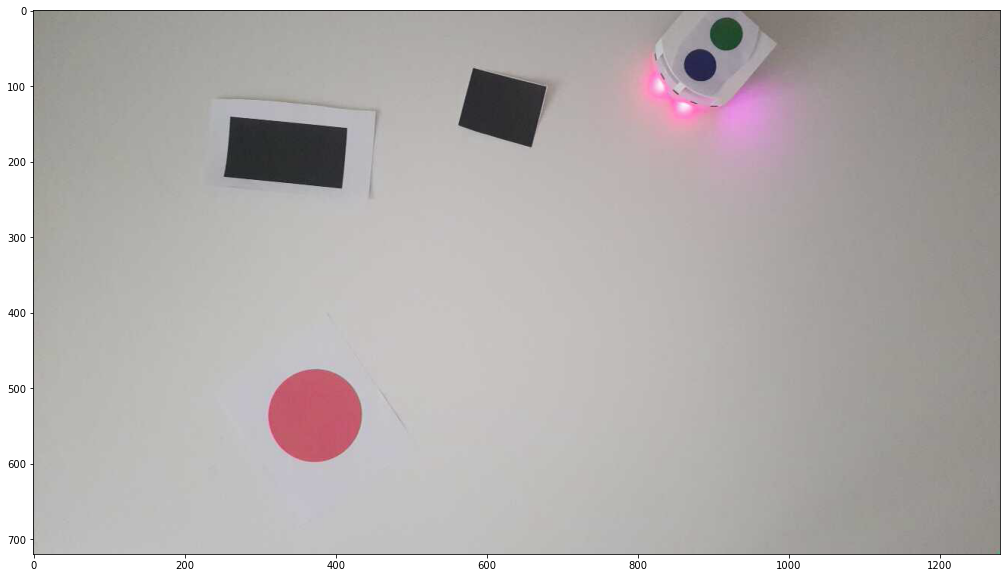

In [17]:
%matplotlib inline
cap = vision.VideoCapture("http://192.168.13.124:8080/video")
plt.figure()

viewCam = False

while viewCam:
    frame = cap.read()
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.show()
    time.sleep(1)
    clear_output()
    
raw_frame = cap.read()
plt.figure(figsize = (50,10))
plt.imshow(cv2.cvtColor(raw_frame,cv2.COLOR_BGR2RGB))
plt.show()


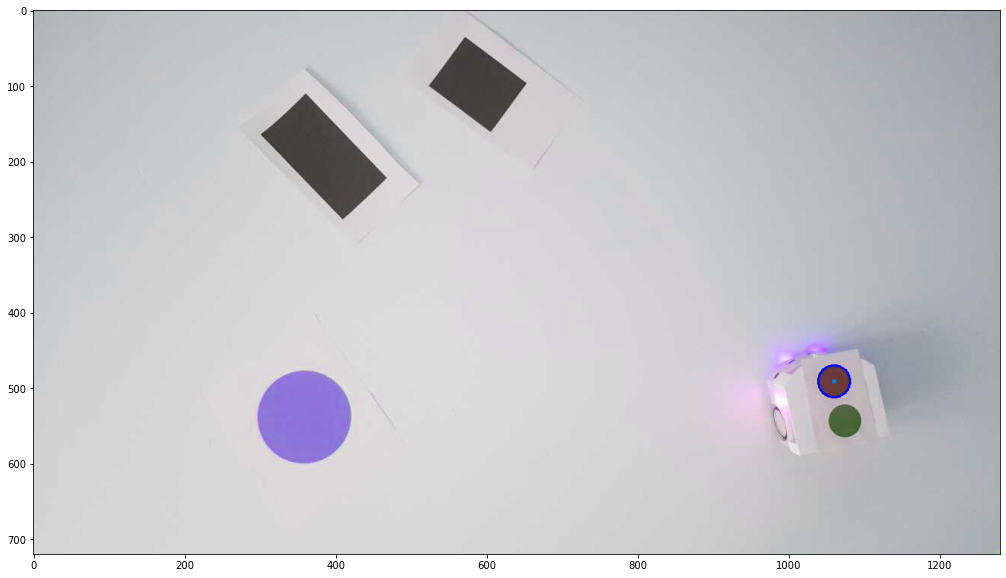

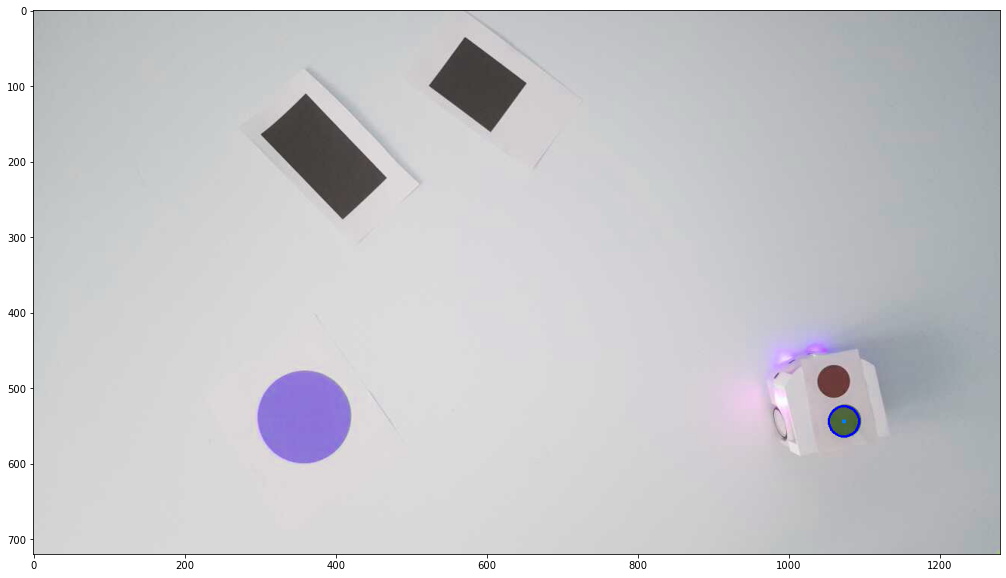

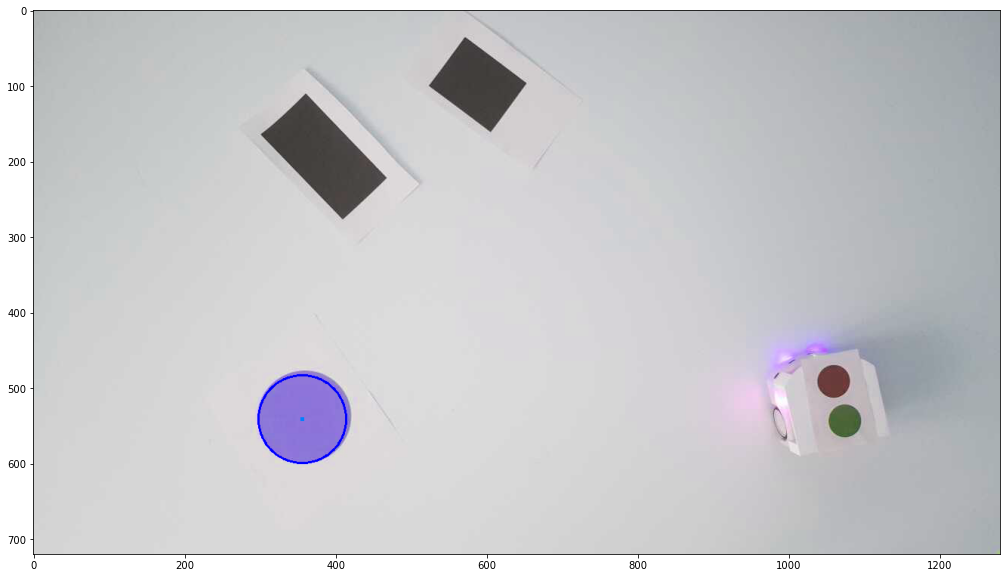

In [66]:
importlib.reload(vision)
%matplotlib inline
frame = raw_frame.copy()
robot_front_absolute, front_image = vision.find_thymio_front(frame)
robot_center_absolute, center_image = vision.find_thymio_center(frame)
destination_center_absolute, destination_image = vision.find_destination_center(frame)
plt.figure(figsize = (50,10))
plt.imshow(front_image)
plt.show()
plt.figure(figsize = (50,10))
plt.imshow(center_image)
plt.show()
plt.figure(figsize = (50,10))
plt.imshow(destination_image)
plt.show()

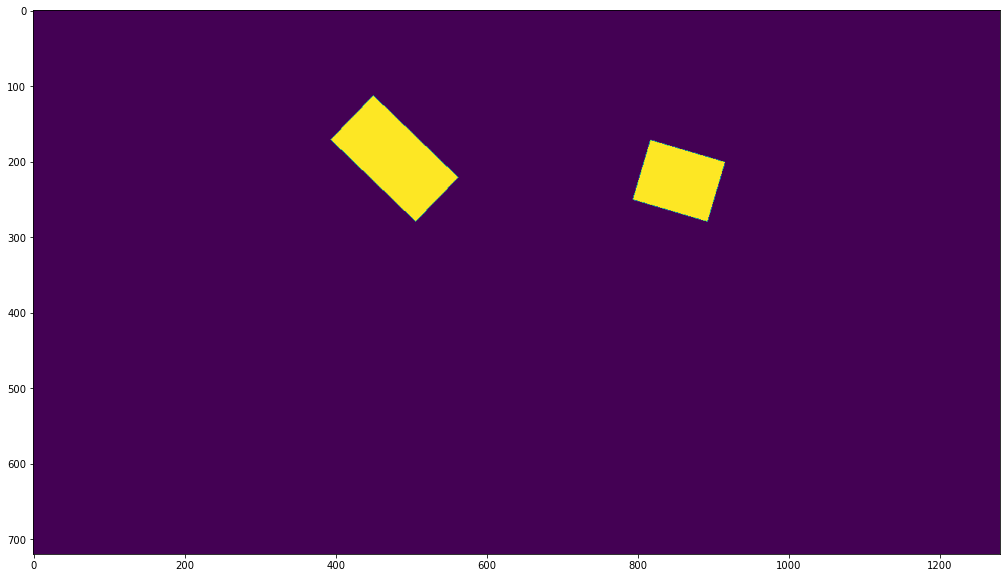

In [90]:
importlib.reload(vision)
%matplotlib inline
importlib.reload(vision)
output_objects = vision.find_objects(frame)
output_objects = cv2.cvtColor(output_objects, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (50,10))
plt.imshow(output_objects)
plt.show()

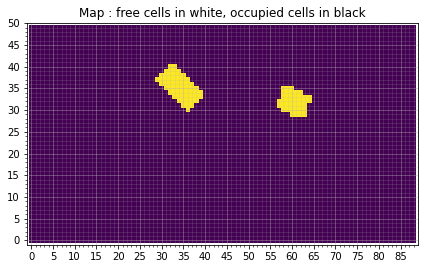

In [42]:
importlib.reload(globalNavigation)
occupancy_grid, cmap = globalNavigation.display_occupancy_grid(output_objects)

In [3]:
# Define the start and end goal
start = (2,2)
goal = (45,40)
max_val = 50

globalNavigation.runAstar(start, goal, max_val, occupancy_grid, cmap)

NameError: name 'occupancy_grid' is not defined

In [3]:
def analyze(cap, destination_center_absolute):
    raw_frame = cap.read()
    frame = raw_frame.copy()
    
    # Find robot position
    robot_center_absolute, _ = vision.find_thymio_center(frame)
    robot_front_absolute, _ = vision.find_thymio_front(frame)
    
    # Detect obstacles positions
    output_objects = vision.find_objects(frame)
    output_objects = cv2.cvtColor(output_objects, cv2.COLOR_BGR2GRAY)
    
    occupancy_grid, cmap = globalNavigation.display_occupancy_grid(output_objects)
    
    # Define the start and end goal
    start = (int(robot_center_absolute[0]*0.0694), int(robot_center_absolute[1]*0.0694))
    goal = (int(destination_center_absolute[0]*0.0694), int(destination_center_absolute[1]*0.0694))
    max_val = 50

    path = globalNavigation.runAstar(start, goal, max_val, occupancy_grid, cmap)

    return robot_front_absolute, robot_center_absolute, path

# MOVE THYMIO

In [4]:
th = Thymio.serial(port="/dev/cu.usbmodem14401", refreshing_rate=0.1)
%matplotlib inline
cap = vision.VideoCapture("http://192.168.13.124:8080/video")

[[1182, 14]]
[[1182, 14], [360, 187]]
index: 0


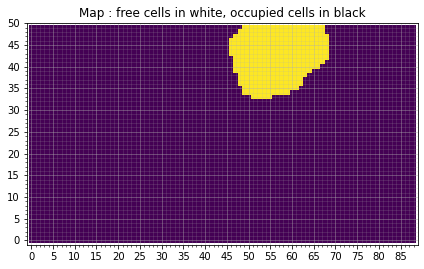

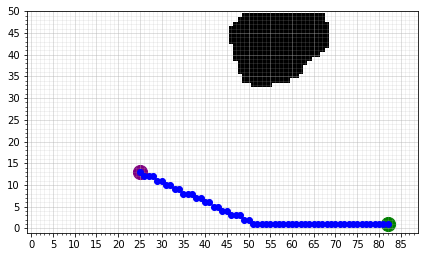

In [5]:

importlib.reload(vision)
importlib.reload(globalNavigation)

frame = cap.read()
destination_center_absolute, _ = vision.find_destination_center(frame)
robot_front_absolute, robot_center_absolute, path = analyze(cap, destination_center_absolute)
tempPath = globalNavigation.transformPath(path)
simplePath = globalNavigation.pathSimplifier(tempPath)
print(simplePath)
globalNavigation.followPath(robot_front_absolute, robot_center_absolute, destination_center_absolute, simplePath, th)


In [8]:
th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)

In [33]:
#with 100 and -100 speed, rotation takes 8.76 sec
#forward value is 37.95

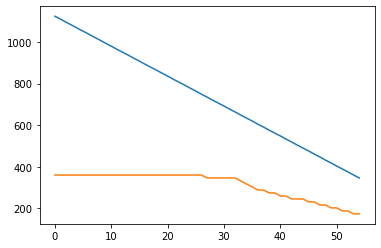

In [76]:
plt.plot(path)

In [40]:
importlib.reload(globalNavigation)
print(len(path))
simplePath = globalNavigation.pathSimplifier(path)
print(simplePath)

2
[[1210, 173]]
[[1210, 173]]


In [31]:
print(path())

TypeError: 'list' object is not callable

In [6]:
globalNavigation.turnAngle(360, th)